In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import imutils
import glob

In [6]:
path = glob.glob("/home/kalyan/visao-computacional/imagens/*")
cv_img = []
for img in path:
    n = cv.imread(img)
    cv_img.append(n)

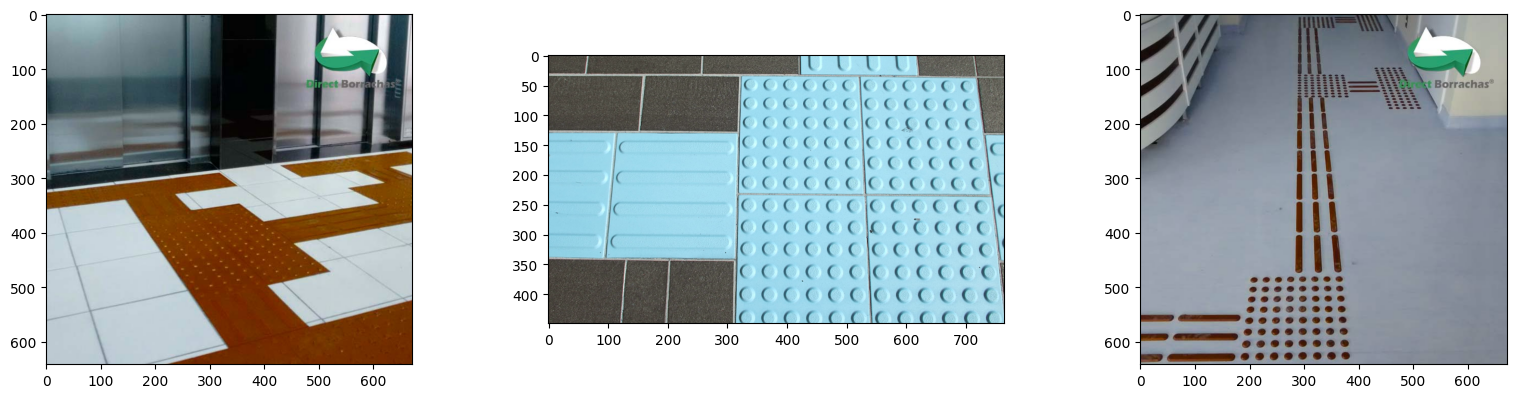

In [8]:
plt.figure(figsize=(20,10))
plt.subplot(2, 3, 1)
plt.imshow(cv_img[0])
plt.subplot(2, 3, 2)
plt.imshow(cv_img[1])
plt.subplot(2, 3, 3)
plt.imshow(cv_img[2])

